# request 패키지

In [3]:
import requests

response = requests.get("https://www.naver.com")

print(response.status_code)

200



<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
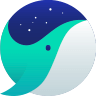
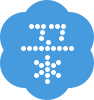

In [4]:
print(response.text)

### 로봇이 아님을 나타내기 위해서 user-agent라는 값을 header에 넣어 보냄
- 직접적인 URL 주소로 요청 시 웹 사이트에서 웹 크롤링을 통해 접근한 것을 감지하고 접속을 차단하게 됨.
- user-agent 헤더 값을 포함하여 요청하면 브라우저를 통해 요청하는 것으로 인식되어 해결

In [7]:
URL = 'http://www.google.com/search'
params = {'q':'python'}
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

response = requests.get(URL, params=params)#, headers=header)
response.raise_for_status() # 응답코드가 200이 아니면 오류를 내고 멈춤

print('상태코드:', response.status_code)

result = response.text

with open('mygoogle2.html', 'w', encoding='utf-8') as f:
    f.write(result)

print('저장 완료!')

상태코드: 200
저장 완료!


## [실습] 네이버 실시간 인기 검색어 추출

In [8]:
URL = 'https://datalab.naver.com'
response = requests.get(URL)
html_text = response.text

In [15]:
temp = html_text.split('<em class="num">1</em>')[1]
temp = temp.split('<span class="title">')[1]
temp = temp.split('</span>')[0]
print(temp)

원피스


# 문자열 검색

In [17]:
import re

# '+'으로 알파벳 소문자가 1개 이상이면 매치
p = re.compile('[a-z]+')

## match()
- 문자열의 처음부터 정규식과 매치되는지 조사

In [25]:
m1 = p.match('python')
print(m1)

m2 = p.match('pYthon')
print(m2)

m3 = p.match('3 python')
print(m3)
m = p.match('python')
if m:
    print('Match Found: ', m.group()) # group():매치된 문자열 반환)
else :
    print('Not Match')

<re.Match object; span=(0, 6), match='python'>
<re.Match object; span=(0, 1), match='p'>
None
Match Found:  python


## search()
- 문자열 전체를 검색하여 처음으로 매치되는 문자열을 찾는다.

In [29]:
m = p.search('3 python')
print(m)

<re.Match object; span=(2, 8), match='python'>


## [문제] 전화번호 추출하기
다음의 전화번호 데이터에서 전화번호만 추출하느 정규표현식 작성하시오
- phone = ['홍길동:010-1111-1111', '우리집:02-555-5555']
- 참고 : \d, {n}

In [31]:

# phone_number(phone[0])

TypeError: 're.Pattern' object is not callable